In [1]:
import sys
import pandas as pd
sys.path.append("../scripts")
from Eda import Eda as eda
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("../data/Week1_challenge_data_source.csv")
eda = eda(data)

In [3]:
data = eda.convertbyte_scale(data, '(Bytes)', '(MB)', 1000000)

In [4]:
outliers = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)','TCP DL Retrans. Vol (MB)','TCP UL Retrans. Vol (MB)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)']
data = eda.fix_outlier(data, outliers)

In [5]:
df = pd.DataFrame()
df['Avg RTT'] = data['Avg RTT DL (ms)'] + data['Avg RTT UL (ms)']
df['Avg TCP'] = data['TCP DL Retrans. Vol (MB)'] + data['TCP UL Retrans. Vol (MB)']
df['Avg TP'] = data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']
df['Avg TP'] = df['Avg TP']/1000
df['Handset_type'] = data['Handset Type']
df['MSISDN/Number'] = data['MSISDN/Number']


num_col, cat_col = eda.col_assign(df)
df = eda.fix_num_cols(df, num_col)
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149429 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Avg RTT        149429 non-null  float64
 1   Avg TCP        149429 non-null  float64
 2   Avg TP         149429 non-null  float64
 3   Handset_type   149429 non-null  object 
 4   MSISDN/Number  149429 non-null  float64
dtypes: float64(4), object(1)
memory usage: 6.8+ MB


###### Aggregate per user


In [7]:
avgrtt = df.groupby(['MSISDN/Number'],as_index=False).agg({'Avg RTT': 'sum'})

In [8]:
avgrtt

,MSISDN/Number,Avg RTT
0,3.360100e+10,46.000000
1,3.360100e+10,31.000000
2,3.360100e+10,68.933860
3,3.360101e+10,84.000000
4,3.360101e+10,119.000000
...,...,...
106852,3.379000e+10,40.000000
106853,4.188282e+10,34999.006506
106854,3.197020e+12,68.933860
106855,3.370000e+14,68.933860


In [9]:
avgtcp = df.groupby(['MSISDN/Number'],as_index=False).agg({'Avg TCP': 'sum'})

In [10]:
avgtcp

,MSISDN/Number,Avg TCP
0,3.360100e+10,4.825495
1,3.360100e+10,4.825495
2,3.360100e+10,4.825495
3,3.360101e+10,4.825495
4,3.360101e+10,14.196495
...,...,...
106852,3.379000e+10,4.825495
106853,4.188282e+10,1966.489545
106854,3.197020e+12,4.825495
106855,3.370000e+14,4.825495


In [11]:
avghandset = df.groupby(['MSISDN/Number'],as_index=False).agg({'Handset_type': 'count'})

In [12]:
avghandset

,MSISDN/Number,Handset_type
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2
...,...,...
106852,3.379000e+10,1
106853,4.188282e+10,494
106854,3.197020e+12,1
106855,3.370000e+14,1


In [13]:
avgtp = df.groupby(['MSISDN/Number'], as_index=False).agg({'Avg TP' : 'sum'})

In [14]:
avgtp

,MSISDN/Number,Avg TP
0,3.360100e+10,0.076000
1,3.360100e+10,0.099000
2,3.360100e+10,0.097000
3,3.360101e+10,0.248000
4,3.360101e+10,42.205429
...,...,...
106852,3.379000e+10,0.116000
106853,4.188282e+10,7977.913277
106854,3.197020e+12,0.001000
106855,3.370000e+14,0.033000


#### Compute and list 10 of the top, bottom and most frequent

In [15]:
lists = ['Avg TCP', 'Avg RTT', 'Avg TP']
eda.head_tail(df, lists, 10)

For Avg TCP
HEAD
0    4.825495
1    4.825495
2    4.825495
3    4.825495
4    4.825495
5    4.825495
6    4.825495
7    4.825495
8    4.825495
9    3.238000
Name: Avg TCP, dtype: float64
TAIL
149990     0.005000
149991     4.825495
149992     4.825495
149993     4.825495
149994     4.825495
149995    16.716000
149996     4.825495
149997     4.825495
149998     4.825495
149999     4.825495
Name: Avg TCP, dtype: float64
For Avg RTT
HEAD
0     47.00000
1     70.00000
2     68.93386
3     68.93386
4     68.93386
5     68.93386
6    107.00000
7     57.00000
8     68.93386
9    104.00000
Name: Avg RTT, dtype: float64
TAIL
149990     58.000000
149991     29.000000
149992     41.000000
149993     52.000000
149994     68.933860
149995    118.795706
149996     32.000000
149997     29.000000
149998     49.000000
149999     42.000000
Name: Avg RTT, dtype: float64
For Avg TP
HEAD
0    0.067
1    0.042
2    0.015
3    0.088
4    0.015
5    0.124
6    0.060
7    4.114
8    0.095
9    6.380
Name: Avg 

In [16]:
for i in lists:
    print(df[i].value_counts().nlargest(10))

4.825495     99269
21.569553      696
0.005000       355
0.002000       353
0.004000       331
0.003000       311
0.001000       307
0.006000       302
0.008000       272
0.007000       250
Name: Avg TCP, dtype: int64
68.93386    27703
29.00000     4992
39.00000     4218
38.00000     2760
40.00000     2646
30.00000     2592
28.00000     2424
49.00000     2216
41.00000     1973
31.00000     1957
Name: Avg RTT, dtype: int64
0.063000     3886
0.015000     3701
15.070475    2319
0.097000     1945
0.090000     1882
0.098000     1800
0.096000     1671
0.099000     1570
0.089000     1556
0.091000     1517
Name: Avg TP, dtype: int64


In [17]:
import seaborn as sns

In [18]:
df['Avg_TP_per_handset'] = df.groupby('Handset_type')['Avg TP'].transform('sum')

In [19]:
df['Avg_TP_per_handset']

0         23901.116973
1         13456.886104
2         18073.543233
3         59533.710558
4          1523.264566
              ...     
149995    59533.710558
149996    20022.171970
149997    25560.462990
149998     8815.261170
149999     5299.624103
Name: Avg_TP_per_handset, Length: 149429, dtype: float64

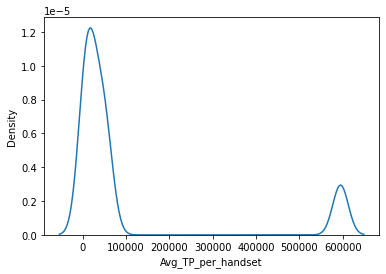

In [20]:
sns.kdeplot(data=df, x='Avg_TP_per_handset')
plt.show()

In [21]:
df['Avg_TP_per_handset'] = df.groupby('Handset_type')['Avg TCP'].transform('sum')

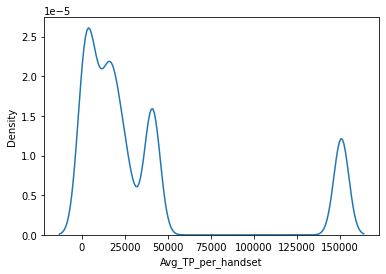

In [22]:
sns.kdeplot(data=df, x='Avg_TP_per_handset')
plt.show()

Task 3.4

In [23]:
dfs = pd.DataFrame()
dfs['Avg TP'] = df['Avg TP']
dfs['Avg TCP'] = df['Avg TCP']
dfs['Avg RTT'] = df['Avg RTT']

In [25]:
km = KMeans(n_clusters=3,)
prediction = km.fit_predict(df[['Avg TP', 'Avg TCP', 'Avg RTT']])
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
df['cluster'] = prediction 

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
print('For Cluster 0')

print(df1.describe())
print('For Cluster 1')

print(df2.describe())
print('For Cluster 2')

print(df3.describe())

For Cluster 0
             Avg RTT        Avg TCP         Avg TP  MSISDN/Number  \
count  113286.000000  113286.000000  113286.000000   1.132860e+05   
mean       50.765021       4.372454       6.008265   4.449262e+10   
std        17.029941       2.423114      12.929062   2.806225e+12   
min         0.000000       0.000000       0.000000   3.360100e+10   
25%        37.000000       4.825495       0.084000   3.365048e+10   
50%        51.000000       4.825495       0.105000   3.366352e+10   
75%        68.933860       4.825495       2.098000   3.368358e+10   
max        84.000000      39.022000      72.416000   8.823970e+14   

       Avg_TP_per_handset   cluster  
count       113286.000000  113286.0  
mean         22971.371488       0.0  
std          28097.753443       0.0  
min              0.000000       0.0  
25%           5883.683261       0.0  
50%          16601.630061       0.0  
75%          28293.724369       0.0  
max         150813.080565       0.0  
For Cluster 1
        